# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Setting up the url

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
query_url = f'{url}appid={weather_api_key}&units={units}&q='


# Lists for the data frame of the next step and import datetime to have a readable date


city_id = []
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_wind_speed = []
city_country = []
city_date = []

# Loop through cities

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    # Get the Json response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id1 = response_json['id']
        city_id.append(city_id1)
            
        city_name1 = response_json['name']
        city_name.append(city_name1)
        
        city_lat1 = response_json['coord']['lat']
        city_lat.append(city_lat1)
        
        city_lng1 = response_json['coord']['lon']
        city_lng.append(city_lng1)
        
        city_max_temp1 = response_json['main']['temp']
        city_max_temp.append(city_max_temp1)
        
        city_humidity1 = response_json['main']['humidity']
        city_humidity.append(city_humidity1)
        
        city_cloudiness1 = response_json['clouds']['all']
        city_cloudiness.append(city_cloudiness1)
        
        city_wind_speed1 = response_json['wind']['speed']
        city_wind_speed.append(city_wind_speed1)
        
        city_country1 = response_json['sys']['country']
        city_country.append(city_country1)
        
        ts = int(response_json['dt'])
        city_date1= datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
        city_date.append(city_date1)
        
        print(f'Processing Record | {city_name}')
    
    # Error message if the city id is not found
    except:
        
        print('City not found. Skipping...')
    
    
        
    

Beginning Data Retrieval
-----------------------------
Processing Record | ['Yellowknife']
City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc']
Processing Record | ['Yellow

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie',

City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen',

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut']
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai'

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

Processing Record | ['Yellowknife', 'Laguna', 'Rikitea', 'Cape Town', 'Khakhea', 'Nanortalik', 'Kununurra', 'Khatanga', 'Hithadhoo', 'Lompoc', 'Busselton', "Severo-Kuril'sk", 'Yumen', 'Sola', 'Daugavpils', 'Punta Arenas', 'Saint-Junien', "Krasnosel'kup", 'Hilo', 'Vaini', 'Moree', 'Quelimane', 'Cidreira', 'Codrington', 'Albany', 'Tomatlán', 'Burnie', 'Hamilton', 'Phang Nga', 'Port Elizabeth', 'Mataura', 'Mehamn', 'Kapaa', 'Vanavara', 'Chokurdakh', 'Amapá', 'Itamaracá', 'Jamestown', 'Avera', 'Qaqortoq', 'Castro', 'Ilulissat', 'Qaanaaq', 'Bluff', 'Geraldton', 'Port Hedland', 'Zhumadian', 'Arraial do Cabo', 'Quatre Cocos', 'Araguaína', 'Kutum', 'Khandyga', 'Airai', 'Bengkulu', 'East London', 'Ratnagiri', 'Lakefield', 'Ushuaia', 'Tevriz', 'Thompson', 'Fortuna', 'Liliani', 'Kingori', 'Kaitangata', 'Philadelphia', 'Saint-Philippe', 'Turinskaya Sloboda', 'São Filipe', 'Clyde River', 'Flinders', 'Mata', 'Amahai', 'Sisimiut', 'Rincon', 'Pulandian', 'Gopālpur', 'George Town', 'Makat', 'Butaritari

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Data Frame
city_df = pd.DataFrame({'ID': city_id, 'City': city_name, 'Lat': city_lat, 'Lng': city_lng, 'Max Temp': city_max_temp, 'Humidity': city_humidity, 'Cloudiness': city_cloudiness, 'Wind Speed': city_wind_speed, 'Country': city_country, 'Date': city_date})
city_df.head()


,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,6185377,Yellowknife,62.4560,-114.3525,-1.42,51,75,4.12,CA,2021-04-30 01:54:21
1,5364271,Laguna,38.4210,-121.4238,30.30,16,1,3.09,US,2021-04-30 01:52:45
2,4030556,Rikitea,-23.1203,-134.9692,25.03,63,77,5.74,PF,2021-04-30 01:54:18
3,3369157,Cape Town,-33.9258,18.4232,12.96,93,0,2.57,ZA,2021-04-30 01:50:17
4,933649,Khakhea,-24.6895,23.4940,16.76,82,62,3.66,BW,2021-04-30 02:04:12


In [9]:

city_df.to_csv('../output_data/cities.csv', index = False, header = True)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
#  Get the indices of cities that have humidity over 100%.

city_df.index[city_df['Humidity'] > 100].tolist()


[]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#since the current data set does not contain a city where the Humidity goes over
# 100%, im skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

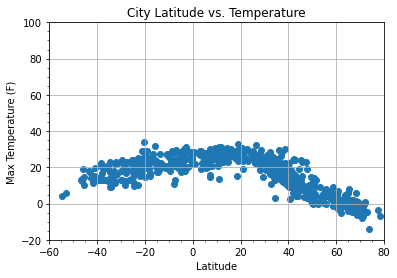

<Figure size 432x288 with 0 Axes>

In [10]:
# Set x an y axis values to graph

x_axis = city_df['Lat']
y_axis = city_df['Max Temp']

# Using matplotlib to get and save the graph

plt.scatter(x_axis, y_axis)
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-60, 80)
plt.ylim(-20, 100)
plt.minorticks_on()
plt.grid()
#plt.tight_layout()
plt.show()
plt.savefig('../output_data/Fig1.png')


# This is to analyze the relationship between the latitude of the cities and the temperature of them,
# as we can see, it gets hotter as it approches the equator and colder as it approches the poles.
# So, there is a significant relationship between these two parameters.

## Latitude vs. Humidity Plot

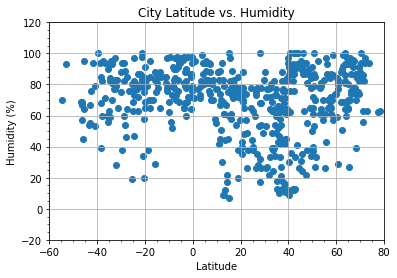

<Figure size 432x288 with 0 Axes>

In [11]:
# Set x an y axis values to graph

x_axis1 = city_df['Lat']
y_axis1 = city_df['Humidity']

# Using matplotlib to get and save the graph

plt.scatter(x_axis1, y_axis1)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(-20, 120)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid()

plt.show()
plt.savefig('../output_data/Fig2.png')


# This graph analyzes the relationship between city latitude and of humidity those places. 
# It seems that most places average a humidity percentage of 60 to 97% acros the dataset, but
# there seems to be no direct relationship of humidity to the latitude.
# So, there is not much of a realtionship

## Latitude vs. Cloudiness Plot

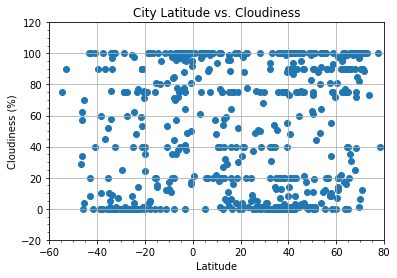

<Figure size 432x288 with 0 Axes>

In [12]:
# Set x an y axis values to graph

x_axis2 = city_df['Lat']
y_axis2 = city_df['Cloudiness']

# Using matplotlib to get and save the graph

plt.scatter(x_axis2, y_axis2)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-20, 120)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid()

plt.show()
plt.savefig('../output_data/Fig3.png')

# This graph analyzes the relationship between latitude and cloudiness. There does not seem to be much of a correlation between
# between latitude and cloudiness. However, most places tend to either have very high Cloudiness percentage or an abismal cloudiness percentaje
# So, there is not much of a realtionship

## Latitude vs. Wind Speed Plot

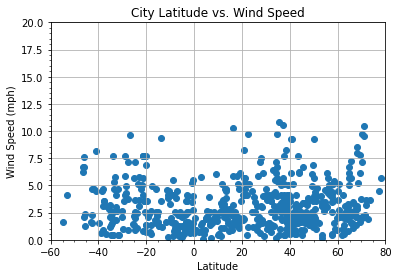

<Figure size 432x288 with 0 Axes>

In [57]:
# Set x an y axis values to graph

x_axis1 = city_df['Lat']
y_axis1 = city_df['Wind Speed']

# Using matplotlib to get and save the graph

plt.scatter(x_axis1, y_axis1)
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 20)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid()

plt.show()
plt.savefig('../output_data/Fig4.png')

#This graph analyzes the relationship between latitude and wind speed. It seems that at the latitude between 
# 15 to 45, the wind speed tends to increase a bit more. Othewise,it averages pretty heavely between 1 to 3 mph. So,
# there is not much of a realtionship

## Linear Regression

In [20]:
lat_check = city_df['Lat'] > 0

northern_h = city_df[lat_check]
southern_h = city_df[~lat_check]
northern_h

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,6185377,Yellowknife,62.4560,-114.3525,-1.42,51,75,4.12,CA,2021-04-30 01:54:21
1,5364271,Laguna,38.4210,-121.4238,30.30,16,1,3.09,US,2021-04-30 01:52:45
5,3421765,Nanortalik,60.1432,-45.2371,2.73,84,7,4.46,GL,2021-04-30 01:54:27
7,2022572,Khatanga,71.9667,102.5000,0.22,97,100,3.17,RU,2021-04-30 01:54:52
9,5367788,Lompoc,34.6391,-120.4579,14.98,77,13,5.66,US,2021-04-30 01:52:24
...,...,...,...,...,...,...,...,...,...,...
558,2027244,Bagdarin,54.4333,113.6000,2.45,57,100,2.66,RU,2021-04-30 02:07:40
559,2686469,Örnsköldsvik,63.2909,18.7153,-1.00,69,17,3.09,SE,2021-04-30 02:07:40
560,1160571,Khāsh,28.2211,61.2158,20.98,32,100,1.72,IR,2021-04-30 02:07:41
561,642455,Pedersore,63.6500,22.6833,0.00,86,0,2.57,FI,2021-04-30 02:07:41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8910611973915169


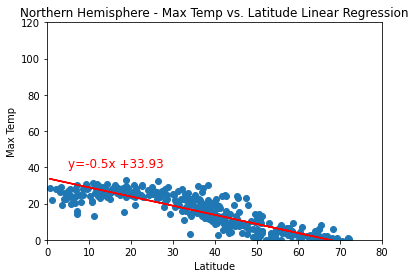

In [58]:
# Data For the plots

x_axis = northern_h['Lat']
y_axis = northern_h['Max Temp']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(5,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(0, 80)
plt.ylim(0, 120)
plt.show()

# This plot sets a regresion model for the maximunm temperature and latitude of the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6775081596868907


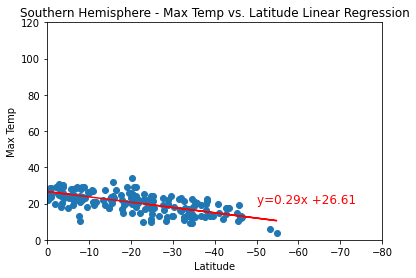

In [33]:
x_axis = southern_h['Lat']
y_axis = southern_h['Max Temp']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(-50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(0, -80)
plt.ylim(0, 120)
plt.show()

# This plot sets a regresion model for the maximunm temperature and latitude of the Southern Hemisphere.

In [ ]:
# The Northern and Southern Hemispheres show a inverse relationship between latitude and temperature. 
# There is a strong linear relationship for both hemishperes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16744061998297613


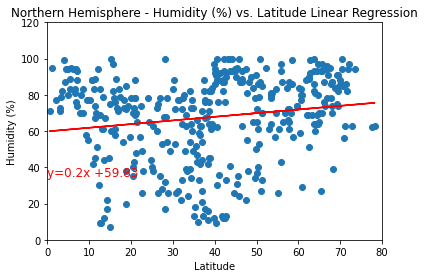

In [36]:
# Data For the plots

x_axis = northern_h['Lat']
y_axis = northern_h['Humidity']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(0, 80)
plt.ylim(0, 120)
plt.show()


# This plot sets a regresion model for the humidity percentaje and latitude of the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17139489167629668


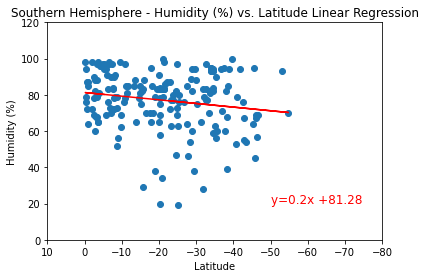

In [40]:
x_axis = southern_h['Lat']
y_axis = southern_h['Humidity']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(-50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(10, -80)
plt.ylim(0, 120)
plt.show()

# This plot sets a regresion model for the humidity percentaje and latitude of the Southern Hemisphere.

In [ ]:
# I think It can be confirmed that the humidity does not fall a trend acoording to the latitude. 
# One can confirm it just by looking at the scattered data

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14276771545539998


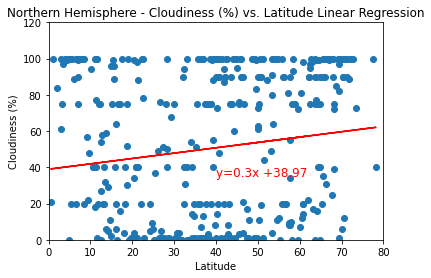

In [42]:
# Data For the plots

x_axis = northern_h['Lat']
y_axis = northern_h['Cloudiness']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(40,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(0, 80)
plt.ylim(0, 120)
plt.show()

# This plot sets a regresion model for the Cloudiness percentaje and latitude of the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2882146271184049


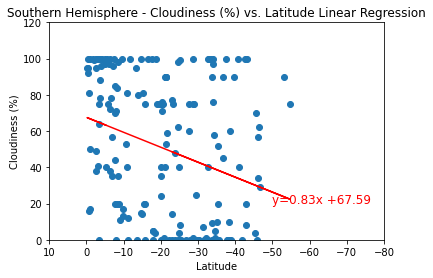

In [43]:
x_axis = southern_h['Lat']
y_axis = southern_h['Cloudiness']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(-50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(10, -80)
plt.ylim(0, 120)
plt.show()

# This plot sets a regresion model for the Cloudiness percentaje and latitude of the Southern Hemisphere.

In [ ]:
# I think It can be confirmed that the cloudiness does not fall a trend acoording to the latitude either. 
# However; the information suggets that the more latitude, the more cloudiness, or at least that there are fewer clouds in the south pole.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13994837076676797


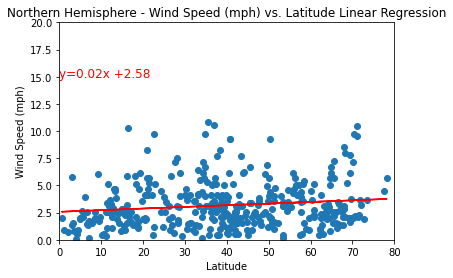

In [46]:
# Data For the plots

x_axis = northern_h['Lat']
y_axis = northern_h['Wind Speed']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(0,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(0, 80)
plt.ylim(0, 20)
plt.show()

# This plot sets a regresion model for the Wind Speed (mph)  and latitude of the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22522170488808957


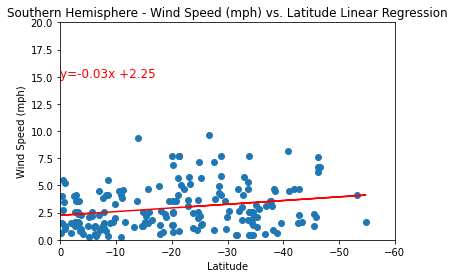

In [50]:
x_axis = southern_h['Lat']
y_axis = southern_h['Wind Speed']

# Statistical values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis , y_axis)

# linear regression model

regress_values = x_axis * slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is: {rvalue}')

# Plot and r value

plt.scatter(x_axis, y_axis)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(0,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(0, -60)
plt.ylim(0, 20)
plt.show()

# This plot sets a regresion model for the Wind Speed (mph)  and latitude of the Southern Hemisphere.

In [ ]:
# The data suggests that that wind speed increases as one gets closer to the poles. The linear relationship seems strong here.